In [3]:
#Important library imports...
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn import preprocessing
from numpy import set_printoptions
%matplotlib inline


crypto_symbols = ['BTC-USD', 'ETH-USD', 'XRP-USD', 'LTC-USD', 'BCH-USD', 'ADA-USD', 'XLM-USD', 'XEM-USD', 'DOGE-USD',
                      'EOS-USD', 'XMR-USD', 'TRX-USD', 'MIOTA-USD', 'DASH-USD', 'BNB-USD', 'NEO-USD', 'ETC-USD',
                      'XTZ-USD', 'ZEC-USD', 'VET-USD', 'OMG-USD', 'ONT-USD', 'BAT-USD', 'QTUM-USD', 'ZRX-USD', 'ICX-USD',
                      'LSK-USD', 'BTG-USD', 'NANO-USD', 'DCR-USD', 'XVG-USD', 'BCD-USD', 'DGB-USD', 'STEEM-USD', 'STRAT-USD',
                      'SC-USD', 'ARDR-USD', 'LRC-USD', 'NEXO-USD', 'BTS-USD', 'REP-USD', 'WAVES-USD', 'QASH-USD', 'CENNZ-USD',
                      'ETP-USD', 'BCN-USD', 'THETA-USD', 'RDD-USD', 'KNC-USD', 'WAXP-USD', 'GNT-USD', 'ANT-USD', 'XIN-USD',
                      'POWR-USD', 'META-USD', 'ENG-USD', 'ELF-USD', 'DENT-USD', 'SNT-USD', 'RDN-USD', 'SYS-USD', 'AE-USD',
                      'PIVX-USD', 'GAS-USD', 'CMT-USD', 'SRN-USD', 'GTO-USD', 'MLN-USD', 'FUN-USD', 'MTL-USD', 'ARK-USD',
                      'STORM-USD', 'CVC-USD', 'PART-USD', 'BNT-USD', 'GAME-USD', 'STEEM-USD', 'GRS-USD', 'NXS-USD', 'FCT-USD',
                      'SALT-USD', 'POE-USD', 'ADX-USD', 'STX-USD', 'NAV-USD', 'POLY-USD', 'HPB-USD', 'PPC-USD', 'GAS-USD',
                      'RLC-USD', 'NEBL-USD', 'STORJ-USD', 'SKY-USD', 'ANT-USD', 'LBC-USD', 'BURST-USD', 'BLOCK-USD', 'SKY-USD']


In [4]:
#Data read in...
crypto_data = pd.read_csv('DATA/complete_dataset.csv')
crypto_data.head()

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,Open,High,Low,Close,Adj Close,Volume,Symbol,DateTime
0,0,0,2022-07-20 00:00:00,0.032179,0.032511,0.032167,0.032317,0.032317,0.0,SNT-USD,2022-07-20 00:00:00
1,1,1,2022-07-20 01:00:00,0.032341,0.032649,0.032337,0.032638,0.032638,190950.0,SNT-USD,2022-07-20 01:00:00
2,2,2,2022-07-20 02:00:00,0.032585,0.032679,0.032537,0.032600,0.032600,0.0,SNT-USD,2022-07-20 02:00:00
3,3,3,2022-07-20 03:00:00,0.032612,0.032672,0.032450,0.032648,0.032648,185209.0,SNT-USD,2022-07-20 03:00:00
4,4,4,2022-07-20 04:00:00,0.032631,0.032706,0.032578,0.032647,0.032647,0.0,SNT-USD,2022-07-20 04:00:00


In [5]:
#Ensure the dataset is properly arranged by cryptocurrency and datetime stamp.
df = crypto_data.sort_values(by=['Symbol', 'DateTime'])
df.head()

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,Open,High,Low,Close,Adj Close,Volume,Symbol,DateTime
909223,93585,0,2021-12-01 00:00:00,1.552028,1.577884,1.545975,1.572530,1.572530,0.0,ADA-USD,2021-12-01 00:00:00
909224,93586,1,2021-12-01 01:00:00,1.574405,1.574405,1.560934,1.566803,1.566803,0.0,ADA-USD,2021-12-01 01:00:00
909225,93587,2,2021-12-01 02:00:00,1.566176,1.582207,1.559194,1.579314,1.579314,13435520.0,ADA-USD,2021-12-01 02:00:00
909226,93588,3,2021-12-01 03:00:00,1.583368,1.586421,1.578478,1.578478,1.578478,10227840.0,ADA-USD,2021-12-01 03:00:00
909227,93589,4,2021-12-01 06:00:00,1.563691,1.586325,1.563691,1.581393,1.581393,0.0,ADA-USD,2021-12-01 06:00:00


In [6]:
#veiwing other portions of the data and the other charcteristics
df.tail()

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,Open,High,Low,Close,Adj Close,Volume,Symbol,DateTime
190889,190889,8672,2023-07-19 19:00:00,0.211796,0.211964,0.211544,0.211544,0.211544,0.0,ZRX-USD,2023-07-19 19:00:00
190890,190890,8673,2023-07-19 20:00:00,0.211527,0.211527,0.210958,0.211019,0.211019,0.0,ZRX-USD,2023-07-19 20:00:00
190891,190891,8674,2023-07-19 21:00:00,0.211019,0.211134,0.209602,0.211134,0.211134,104636.0,ZRX-USD,2023-07-19 21:00:00
190892,190892,8675,2023-07-19 22:00:00,0.211151,0.211420,0.210061,0.210210,0.210210,0.0,ZRX-USD,2023-07-19 22:00:00
190893,190893,8676,2023-07-19 23:00:00,0.210222,0.210762,0.210096,0.210339,0.210339,0.0,ZRX-USD,2023-07-19 23:00:00


PREPROCESSING

In [7]:
#Create a different column for date to avoid kwarg error, convert string element to date time and set as index

df['DT'] = pd.to_datetime(df['DateTime'])
df.set_index('DT', inplace=True)

In [8]:
#removing the redundant columns
df.drop(labels=['Unnamed: 0.2', 'Unnamed: 0.1', 'Unnamed: 0', 'DateTime'],
    axis = 1,
    inplace= True)


In [9]:
#Let review some datetime characteristics
print('Earliest date is {} and Latest Date is {}'.format(df.index.min(),df.index.max()))
time_span = df.index.max() - df.index.min()
print('The time span of the dataset is {}'.format(time_span))

Earliest date is 2021-12-01 00:00:00 and Latest Date is 2023-07-19 23:00:00
The time span of the dataset is 595 days 23:00:00


In [ ]:
'''This represent 20 months of historic data ensuring recency of the data while avoiding the impact of COVID-19 that 
impacted the cryptocurrency market and other financial markets in a haphazard manner keeping in mind that we may never be able
to model an even tlike a PANDEMIC into our predictive model. In other words, the data points of 2020 and early 2021 are 
considered as outliers'''
#to limit the data to a strict 20 month period, i would limit the data from 15th Dec 2021 to 15th July 2023


In [10]:
df_trim = df.loc['2021-12-15':'2023-07-15']
df_trim

,Open,High,Low,Close,Adj Close,Volume,Symbol
DT,,,,,,,
2021-12-15 00:00:00,1.266263,1.272902,1.259497,1.259497,1.259497,0.0,ADA-USD
2021-12-15 01:00:00,1.260340,1.261058,1.251848,1.252598,1.252598,0.0,ADA-USD
2021-12-15 02:00:00,1.252510,1.252510,1.245383,1.251202,1.251202,0.0,ADA-USD
2021-12-15 03:00:00,1.249214,1.254076,1.247422,1.253171,1.253171,0.0,ADA-USD
2021-12-15 04:00:00,1.254942,1.256520,1.245106,1.250663,1.250663,33317504.0,ADA-USD
...,...,...,...,...,...,...,...
2023-07-15 19:00:00,0.224260,0.225587,0.224239,0.225112,0.225112,0.0,ZRX-USD
2023-07-15 20:00:00,0.225113,0.225113,0.223184,0.223278,0.223278,0.0,ZRX-USD
2023-07-15 21:00:00,0.223284,0.223316,0.222090,0.222720,0.222720,0.0,ZRX-USD


In [23]:
df_trim.dtypes

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume       float64
Symbol        object
dtype: object

## EXPLORATORY DATA  ANALYSIS

In [11]:
#Lets take a look at the dataset as a whole
np.set_printoptions(precision=3, threshold=75)
df_trim.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1.197932e+06,1.197932e+06,1.197932e+06,1.197932e+06,1.197932e+06,1.197932e+06
mean,3.563481e+02,3.574255e+02,3.552341e+02,3.563321e+02,3.563321e+02,6.953826e+06
std,3.147151e+03,3.156605e+03,3.137322e+03,3.146993e+03,3.146993e+03,6.328766e+08
min,1.000008e-08,1.000195e-08,1.000002e-08,1.000021e-08,1.000021e-08,0.000000e+00
25%,4.488545e-02,4.527350e-02,4.450034e-02,4.486306e-02,4.486306e-02,0.000000e+00
50%,2.601070e-01,2.616497e-01,2.584609e-01,2.600698e-01,2.600698e-01,0.000000e+00
75%,1.515954e+00,1.525699e+00,1.506275e+00,1.515571e+00,1.515571e+00,7.793000e+04
max,5.183206e+04,5.195633e+04,5.167119e+04,5.181817e+04,5.181817e+04,6.273375e+11


# Univariate Analysis

### Univariate Analysis using the BTC subset

In [44]:
#Lets take a look at the BTC data.
df_BTC = df_trim.loc[df_trim['Symbol']== 'BTC-USD']
df_BTC.head()

,Open,High,Low,Close,Adj Close,Volume,Symbol
DT,,,,,,,
2021-12-15 00:00:00,48379.753906,48671.156250,48157.632812,48164.609375,48164.609375,0.0,BTC-USD
2021-12-15 01:00:00,48183.988281,48205.738281,48050.554688,48105.484375,48105.484375,0.0,BTC-USD
2021-12-15 02:00:00,48107.371094,48113.628906,47932.328125,48012.097656,48012.097656,0.0,BTC-USD
2021-12-15 03:00:00,48019.878906,48278.164062,47988.476562,48278.164062,48278.164062,0.0,BTC-USD
2021-12-15 04:00:00,48299.117188,48397.773438,48125.097656,48287.515625,48287.515625,0.0,BTC-USD


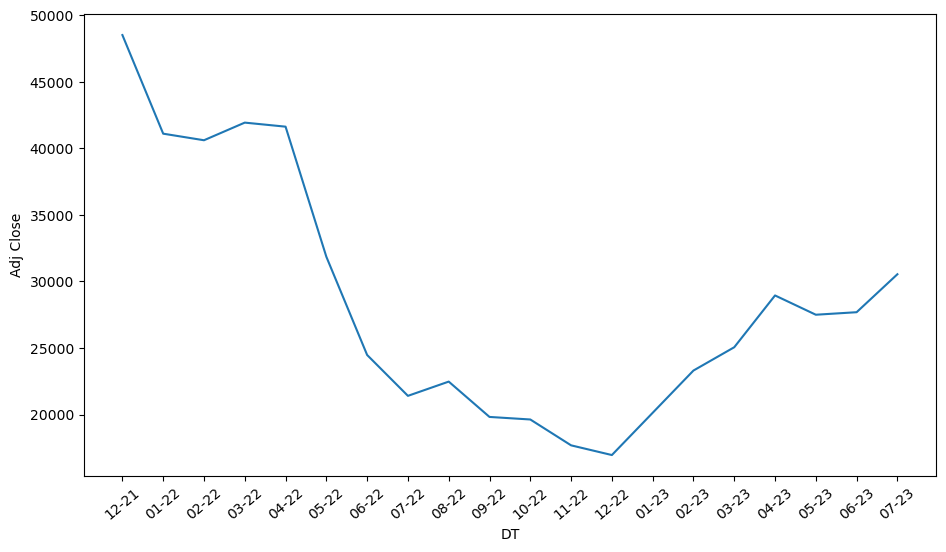

In [96]:
# Resample the data to a monthly frequency and calculate the mean for each month
df_BTC_monthly = df_BTC.resample('M').mean()

plt.figure(figsize=(11,6))

# Create a line plot using Seaborn
sns.lineplot(data=df_BTC_monthly, 
             x=df_BTC_monthly.index.map(lambda x: x.strftime('%m-%y')),
             y='Adj Close'
          )
plt.xticks(df_BTC_monthly.index.map(lambda x: x.strftime('%m-%y')), rotation='40')

plt.show()

In [67]:
df_BTC.shape

(13752, 7)

In [69]:
df_BTC.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
Symbol       0
dtype: int64

In [70]:
df_BTC.dtypes

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume       float64
Symbol        object
dtype: object

In [80]:
#Lets create  target values(closing value of next day and a difference or gain) in the dataset 
df_BTC_2 = df_BTC.assign(close_next = df_BTC['Open'].shift(-1),
                     diff= df_BTC['Adj Close']-df_BTC['Open']).drop('Symbol', axis=1)
df_BTC_2
#This will create 2 output features >>>>>Close_next >> & >>>>>Diff

,Open,High,Low,Close,Adj Close,Volume,close_next,diff
DT,,,,,,,,
2021-12-15 00:00:00,48379.753906,48671.156250,48157.632812,48164.609375,48164.609375,0.0,48183.988281,-215.144531
2021-12-15 01:00:00,48183.988281,48205.738281,48050.554688,48105.484375,48105.484375,0.0,48107.371094,-78.503906
2021-12-15 02:00:00,48107.371094,48113.628906,47932.328125,48012.097656,48012.097656,0.0,48019.878906,-95.273438
2021-12-15 03:00:00,48019.878906,48278.164062,47988.476562,48278.164062,48278.164062,0.0,48299.117188,258.285156
2021-12-15 04:00:00,48299.117188,48397.773438,48125.097656,48287.515625,48287.515625,0.0,48286.410156,-11.601562
...,...,...,...,...,...,...,...,...
2023-07-15 19:00:00,30333.402344,30357.132812,30333.265625,30342.019531,30342.019531,0.0,30339.591797,8.617188
2023-07-15 20:00:00,30339.591797,30339.591797,30301.136719,30314.359375,30314.359375,0.0,30313.179688,-25.232422
2023-07-15 21:00:00,30313.179688,30313.191406,30296.662109,30312.607422,30312.607422,0.0,30307.382812,-0.572266


array([<AxesSubplot:xlabel='DT'>, <AxesSubplot:xlabel='DT'>,
       <AxesSubplot:xlabel='DT'>, <AxesSubplot:xlabel='DT'>,
       <AxesSubplot:xlabel='DT'>, <AxesSubplot:xlabel='DT'>,
       <AxesSubplot:xlabel='DT'>, <AxesSubplot:xlabel='DT'>], dtype=object)

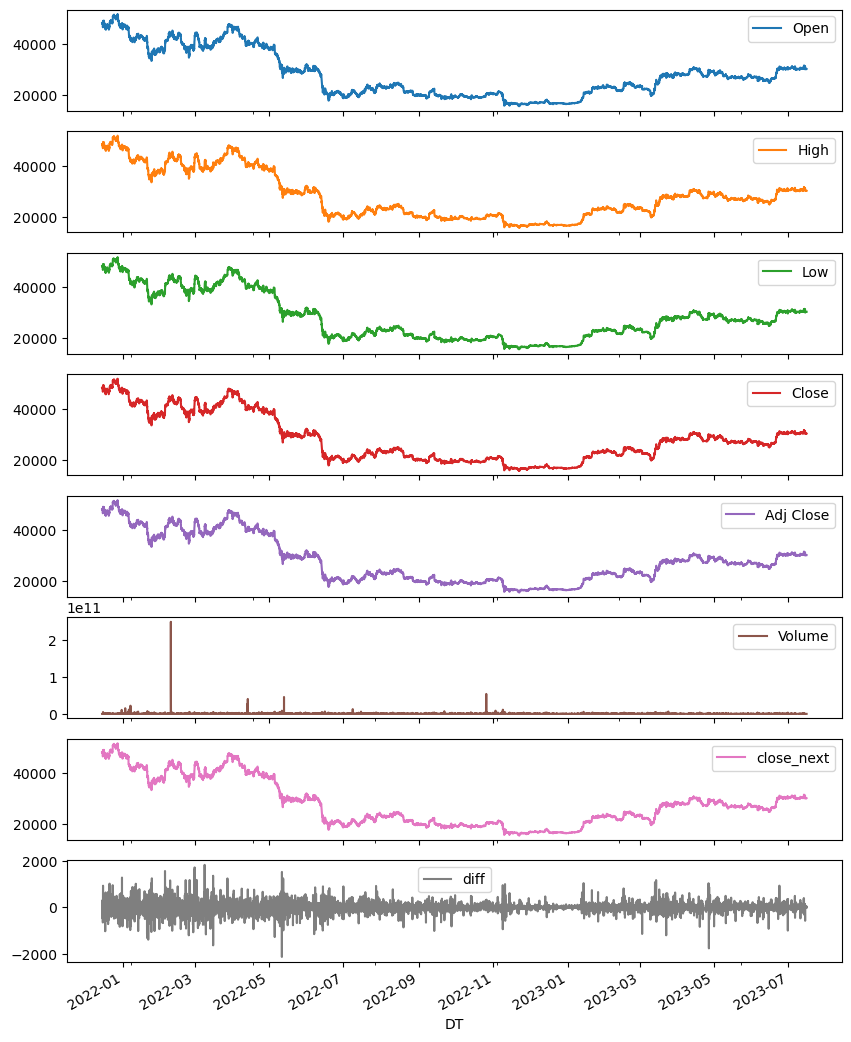

In [77]:
#in order to determine if the data has any trends, a simple plot of each column is used.
df_BTC_2.plot(subplots= True, figsize=(10,14))

<AxesSubplot:>

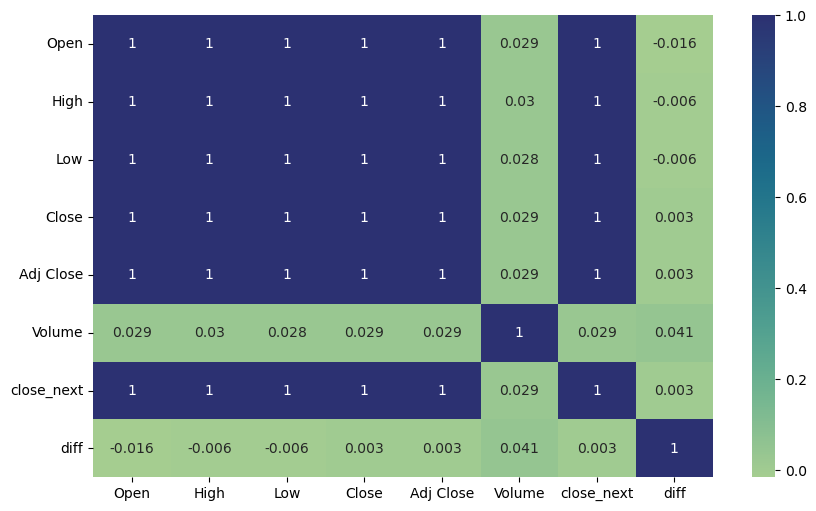

In [92]:
#Exploring the features most predictive of the target values
plt.figure(figsize=(10, 6)) 
df_BTC_corr = round(df_BTC_2.corr(),3)
sns.heatmap(df_BTC_corr, annot= True, cmap = 'crest')

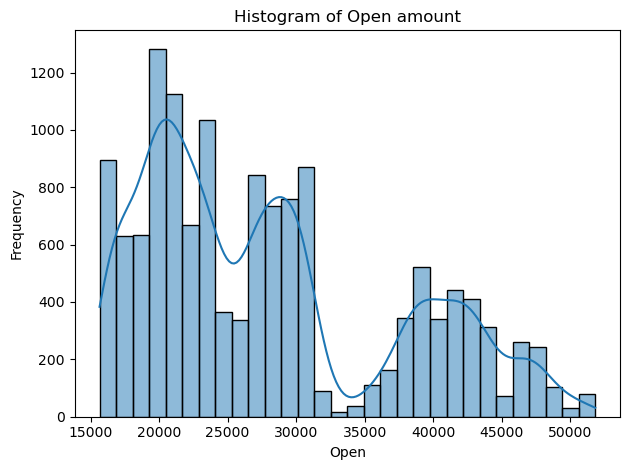

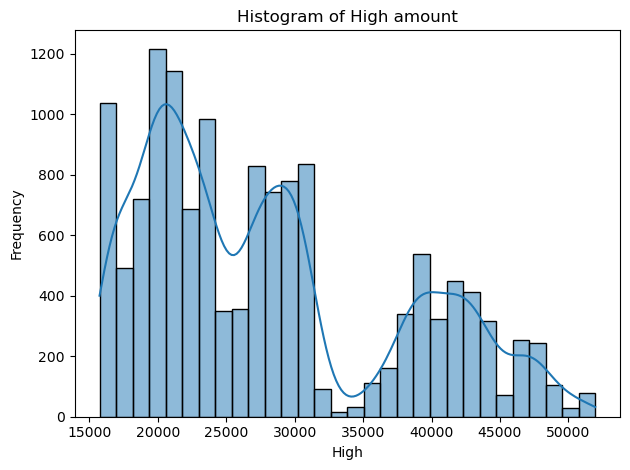

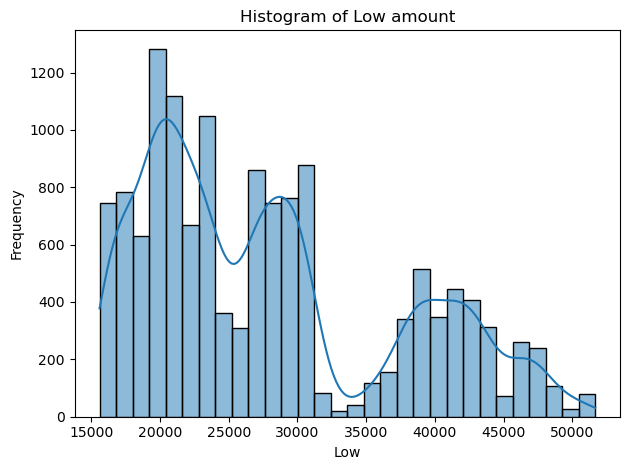

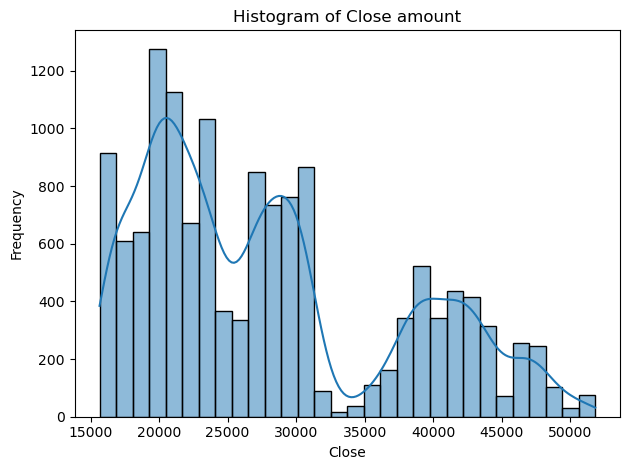

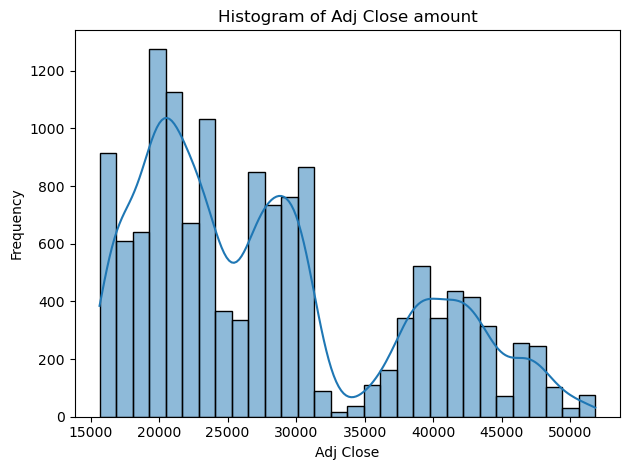

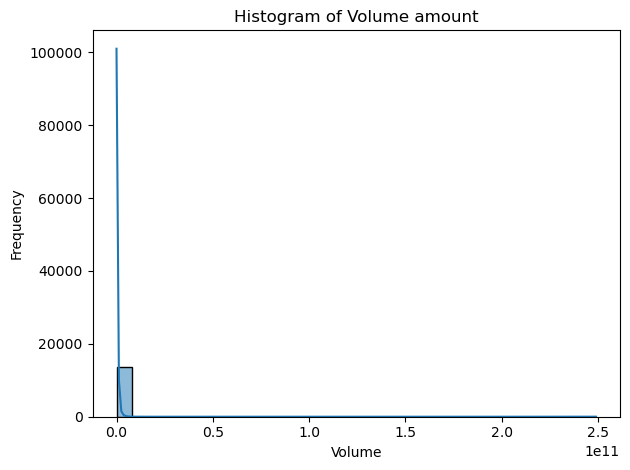

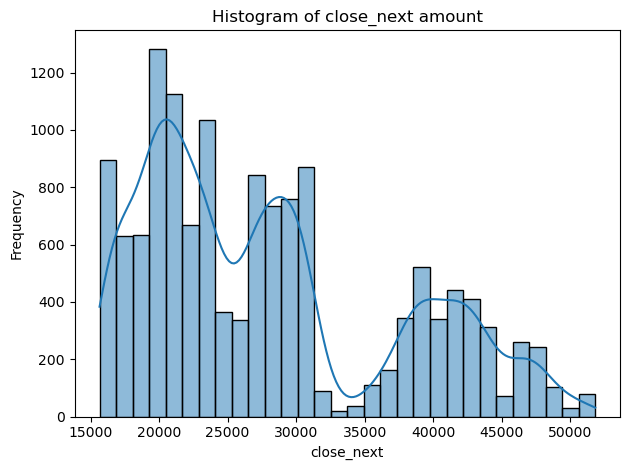

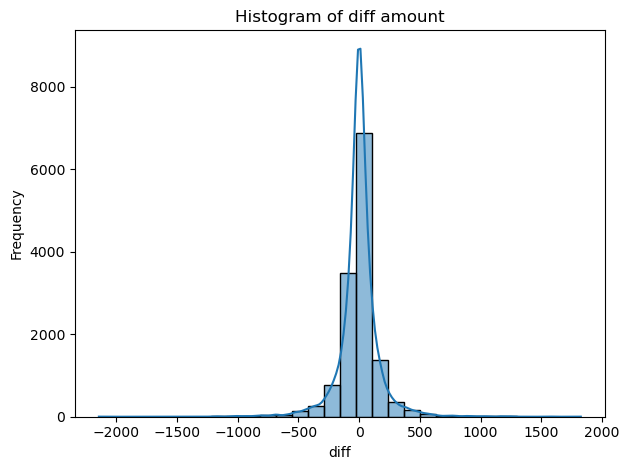

In [141]:
for i,column in enumerate(df_BTC_2.columns):
    sns.histplot(df_BTC_2[column],kde=True, bins=30)  # Create the histogram using Seaborn
    plt.title(f'Histogram of {column} amount')  # Add a title for each histogram
#   plt.xlabel({column})  # Add x-axis label (column name)
    plt.ylabel('Frequency')  # Add y-axis label
    plt.tight_layout()
    plt.show()  # Display the histogram
# fig,((ax0,ax1), (ax2,ax3), (ax4,ax5),(ax6,ax7)) = plt.subplots(nrows=4, ncols=2)

# fig,axes = plt.subplots(nrows=4, ncols=2, figsize=(10,12))

# for i, columns in enumerate(df_BTC_2.columns):
#     row = i // 2
#     col = i % 2
    
#     ax = axes[row,col]
#     ax.hist(df_BTC_2[column], bins=50)
#     ax.set_title(f'Histogram of {column} amount')  # Add a title for each histogram
#     ax.set_ylabel('Frequency')  # Add y-axis label
    
# plt.tight_layout()
# plt.show()  # Display the histogram

In [ ]:
#We need to find a way  to generalize these characteristics to the larger data that is 
# that is, the possibility that all the cryptocurrencies in the larger dataset follow these characteristics.


In [ ]:
#In order to explore the data properly each cryptocurrency needs to be explored independently.

In [ ]:
#Seperate the dataset in Training and testing datasets.

In [ ]:
# if (df['Symbol']==df['Symbol'].shift()).all():
#     df['previous_close'] = df.shift(1)['Adj Close'] 
# df.head()

In [ ]:
# for i, row in crypto_data:
#     if crypto_data(i)['Symbol'] == crypto_data.shift(i)['Symbol']:
#         crypto_data['Diff_Close'] = crypto_data.shift(i)['Adj Close'] - crypto_data(i)['Adj Close']

# crypto_data['Diff_Close'] = crypto_data.groupby('Symbol')['Adj Close'].diff().shift(-1)

In [ ]:
# df['GainOrLoss'] = df['Adj Close'] - df['previous_close']
# df[500:700:10]

In [ ]:
# df.shape

In [ ]:
# The pre-processing of the data would involve extensive extensive data mungling and feature enginnering
# Hence data splitting would be done early to avoid spilling future data in to the past.


In [ ]:
# BTC_df = (df[df['Symbol']=='BTC-USD']).sort_values(by='DateTime', ascending=False )

# plt.figure(figsize=(12,10))
    
# ax1= sns.lineplot(x=BTC_df.index,
#     y='Adj Close',
#     data=BTC_df,        
#     linewidth= 3,
#     sort=True)
# plt.show()

In [ ]:
# !pip install sktime
# from sktime import plot_series